🔍 Looking for dataset file...
✅ Found dataset at: ../datasets/full_data.csv
📍 Current working directory: c:\Users\Admin\habitable-planet-hunter\Models
📁 Contents: ['Chithra.ipynb']
HABITABLE PLANET HUNTER - TRAINING PIPELINE
Author: Chithra

📖 Loading dataset from: ../datasets/full_data.csv
✅ Successfully loaded dataset
   Shape: 4048 rows × 112 columns

📋 Dataset Overview:
   Columns: P_NAME, P_STATUS, P_MASS, P_MASS_ERROR_MIN, P_MASS_ERROR_MAX...
   First few rows:
     P_NAME  P_STATUS     P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0  11 Com b       3.0  6165.8633        -476.74200         476.74200   
1  11 UMi b       3.0  4684.7848        -794.57001         794.57001   
2  14 And b       3.0  1525.5744               NaN               NaN   

   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  ...  \
0       NaN                 NaN                 NaN    2007  2014-05-14  ...   
1       NaN                 NaN                 NaN    2009  2018-09-06  ...   

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['P_GEO_ALBEDO' 'P_DETECTION_MASS' 'P_DETECTION_RADIUS' 'P_ALT_NAMES'
 'P_ATMOSPHERE' 'S_DISC' 'S_MAGNETIC_FIELD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['P_GEO_ALBEDO' 'P_DETECTION_MASS' 'P_DETECTION_RADIUS' 'P_ALT_NAMES'
 'P_ATMOSPHERE' 'S_DISC' 'S_MAGNETIC_FIELD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✅ Model trained successfully!

📊 Evaluating model...
✅ Accuracy: 99.88%
✅ ROC-AUC Score: 0.8724

📋 Classification Report:
               precision    recall  f1-score   support

Non-habitable       1.00      1.00      1.00       806
    Habitable       1.00      0.75      0.86         4

     accuracy                           1.00       810
    macro avg       1.00      0.88      0.93       810
 weighted avg       1.00      1.00      1.00       810



c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['P_GEO_ALBEDO' 'P_DETECTION_MASS' 'P_DETECTION_RADIUS' 'P_ALT_NAMES'
 'P_ATMOSPHERE' 'S_DISC' 'S_MAGNETIC_FIELD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


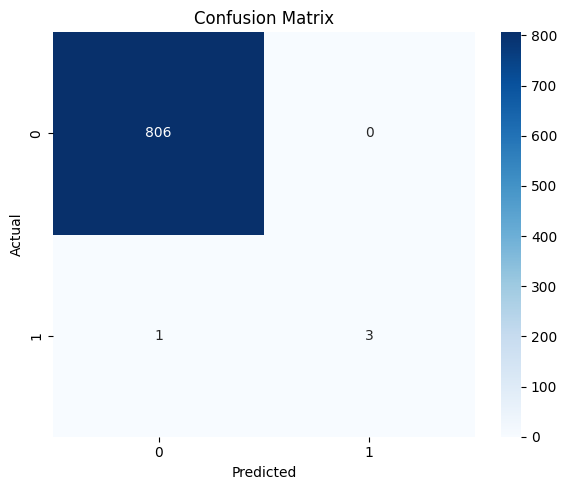


💾 Saving model...
✅ Model saved successfully!
   Location: ../Models\habitable_planet_model_Chithra.pkl
   File size: 203.6 KB
   ✅ Model verification: Can be loaded back

🎉 TASK COMPLETED SUCCESSFULLY!
📊 Model Performance:
   Accuracy: 99.88%
   ROC-AUC: 0.8724

📁 Model saved as:
   habitable_planet_model_Chithra.pkl

📍 Location:
   c:\Users\Admin\habitable-planet-hunter\Models\habitable_planet_model_Chithra.pkl

✅ You can now submit this for Issue #9!

🎯 Task Summary:
1. ✓ Code organized and readable
2. ✓ Model saved with your name: Chithra
3. ✓ File created: habitable_planet_model_Chithra.pkl

✅ Issue #9 requirements completed!


In [ ]:

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

YOUR_NAME = "Chithra"

def find_dataset():
    """
    Find the dataset file in various possible locations.
    """
    print("🔍 Looking for dataset file...")
    
    possible_paths = [
        "../datasets/full_data.csv",
        "./datasets/full_data.csv",
        "./full_data.csv",
        "../../datasets/full_data.csv",
        "datasets/full_data.csv",
        "full_data.csv",
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            print(f"✅ Found dataset at: {path}")
            return path
    
    print(f"\n📁 Current directory: {os.getcwd()}")
    print("📂 Files and folders in current directory:")
    for item in os.listdir('.'):
        print(f"  - {item}")
    
    if os.path.exists('../datasets'):
        print("\n📂 Files in ../datasets folder:")
        for item in os.listdir('../datasets'):
            print(f"  - {item}")
    
    raise FileNotFoundError(
        "Could not find 'full_data.csv'. Please make sure:\n"
        "1. You're in the correct directory\n"
        "2. The dataset exists in a 'datasets' folder\n"
        "3. Run this code from the main project folder"
    )

DATASET_PATH = find_dataset()

MODELS_DIR = "./Models"
if not os.path.exists(MODELS_DIR):
    MODELS_DIR = "../Models"

MODEL_FILENAME = f"habitable_planet_model_{YOUR_NAME}.pkl"
MODEL_PATH = os.path.join(MODELS_DIR, MODEL_FILENAME)

def ensure_directory_exists(path: str) -> None:
    """Create directory if it doesn't exist."""
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"📁 Created directory: {path}")

def load_dataset(file_path: str) -> pd.DataFrame:
    """Load and inspect the dataset."""
    print(f"\n📖 Loading dataset from: {file_path}")
    
    try:
        df = pd.read_csv(file_path)
        print(f"✅ Successfully loaded dataset")
        print(f"   Shape: {df.shape[0]} rows × {df.shape[1]} columns")
        
        print("\n📋 Dataset Overview:")
        print(f"   Columns: {', '.join(df.columns[:5])}...")
        print(f"   First few rows:")
        print(df.head(3))
        
        return df
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        raise

def prepare_data(df: pd.DataFrame):
    """
    Prepare features and target from the dataset.
    """
    print("\n🔧 Preparing data...")

    habitable_columns = [col for col in df.columns if 'HABITABLE' in col.upper()]
    if not habitable_columns:
        print("⚠  No 'HABITABLE' column found. Available columns:")
        for col in df.columns:
            print(f"   - {col}")
        raise ValueError("No habitable column found")
    
    target_col = habitable_columns[0]
    print(f"🎯 Using '{target_col}' as target column")
    
    unique_values = df[target_col].dropna().astype(str).str.upper().unique()
    print(f"   Unique values in target: {unique_values[:10]}")
    
    y = df[target_col].astype(str).str.upper().str.strip()
    y_binary = y.map({'YES': 1, '1': 1, 'TRUE': 1, '0': 0, 'NO': 0, 'FALSE': 0})
    
    if y_binary.isna().any():
        print(f"⚠  {y_binary.isna().sum()} rows have unmapped target values")
        y_binary = y_binary.fillna(0) 
    
    y = y_binary.astype(int)
    
    feature_cols = []
    for col in df.columns:
        if col != target_col and pd.api.types.is_numeric_dtype(df[col]):
            feature_cols.append(col)
    
    print(f"📊 Using {len(feature_cols)} numeric features")
    print(f"   Sample features: {feature_cols[:8]}")
    
    X = df[feature_cols].copy()
    
    print(f"\n📈 Class Distribution:")
    print(f"   Habitable (1): {y.sum()} planets ({(y.sum()/len(y))*100:.1f}%)")
    print(f"   Non-habitable (0): {(len(y)-y.sum())} planets ({(1-y.sum()/len(y))*100:.1f}%)")
    
    return X, y

def create_preprocessor():
    """Create a simple preprocessing pipeline."""
    print("\n⚙️ Creating preprocessing pipeline...")
    
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    return preprocessor
def train_model(X_train, y_train):
    """Train a Random Forest model."""
    print("\n🎯 Training model...")
    
    preprocessor = create_preprocessor()
    
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=RANDOM_SEED,
            class_weight='balanced',
            n_jobs=-1
        ))
    ])
    
    print("   Fitting model...")
    model_pipeline.fit(X_train, y_train)
    
    print("✅ Model trained successfully!")
    return model_pipeline

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance."""
    print("\n📊 Evaluating model...")
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"✅ Accuracy: {accuracy * 100:.2f}%")
    print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
    
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, 
                                target_names=['Non-habitable', 'Habitable']))
    
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return accuracy, roc_auc

def save_model_pickle(model):
    """Save model using pickle."""
    print(f"\n💾 Saving model...")
    
    ensure_directory_exists(MODELS_DIR)
    
    with open(MODEL_PATH, 'wb') as f:
        pickle.dump(model, f)
    
    print(f"✅ Model saved successfully!")
    print(f"   Location: {MODEL_PATH}")
    print(f"   File size: {os.path.getsize(MODEL_PATH) / 1024:.1f} KB")
    
    try:
        with open(MODEL_PATH, 'rb') as f:
            _ = pickle.load(f)
        print("   ✅ Model verification: Can be loaded back")
    except Exception as e:
        print(f"   ⚠  Verification warning: {e}")
    
    return MODEL_PATH

def main():
    """Main execution pipeline."""
    print("=" * 60)
    print("HABITABLE PLANET HUNTER - TRAINING PIPELINE")
    print(f"Author: {YOUR_NAME}")
    print("=" * 60)
    
    try:
        df = load_dataset(DATASET_PATH)

        X, y = prepare_data(df)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, 
            test_size=0.2,
            random_state=RANDOM_SEED,
            stratify=y
        )
        
        print(f"\n📈 Data Split:")
        print(f"   Training set: {X_train.shape[0]} samples")
        print(f"   Test set: {X_test.shape[0]} samples")
        
        model = train_model(X_train, y_train)
        
        accuracy, roc_auc = evaluate_model(model, X_test, y_test)
        
        model_path = save_model_pickle(model)
        
        print("\n" + "=" * 60)
        print("🎉 TASK COMPLETED SUCCESSFULLY!")
        print("=" * 60)
        print(f"📊 Model Performance:")
        print(f"   Accuracy: {accuracy * 100:.2f}%")
        print(f"   ROC-AUC: {roc_auc:.4f}")
        print(f"\n📁 Model saved as:")
        print(f"   {MODEL_FILENAME}")
        print(f"\n📍 Location:")
        print(f"   {os.path.abspath(model_path)}")
        print("\n✅ You can now submit this for Issue #9!")
        print("=" * 60)
        
        return model
        
    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        print("\n💡 Quick fix: Run this code from the main project folder:")
        print("1. Open terminal/command prompt")
        print("2. Type: cd habitable-planet-hunter")
        print("3. Run your notebook from there")
        return None

if __name__ == "__main__":
    print(f"📍 Current working directory: {os.getcwd()}")
    print(f"📁 Contents: {os.listdir('.')}")
    
    trained_model = main()
    
    if trained_model:
        print("\n🎯 Task Summary:")
        print("1. ✓ Code organized and readable")
        print(f"2. ✓ Model saved with your name: {YOUR_NAME}")
        print(f"3. ✓ File created: {MODEL_FILENAME}")
        print("\n✅ Issue #9 requirements completed!")